In [231]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [232]:
data=yf.download('GOOG','2012-01-01','2022-12-31')

[*********************100%%**********************]  1 of 1 completed


In [233]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.554291,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.625692,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.395069,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.171415,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.485767,233776981


In [269]:
data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
2763,2022-12-23,87.620003,90.099998,87.620003,89.809998,89.707916,17815000
2764,2022-12-27,89.309998,89.500000,87.535004,87.930000,87.830055,15470900
2765,2022-12-28,87.500000,88.519997,86.370003,86.459999,86.361725,17879600
2766,2022-12-29,87.029999,89.364998,86.989998,88.949997,88.848892,18280700
2767,2022-12-30,87.364998,88.830002,87.029999,88.730003,88.629150,19190300


In [238]:
data.reset_index(inplace=True)

In [239]:
data.shape

(2768, 7)

In [240]:
close=data['Close'].values

In [241]:
close=close.reshape(-1,1)
close.shape

(2768, 1)

In [242]:
train_len=round(len(close)*0.8)
test_len=len(close)-train_len

In [243]:
train_len,test_len

(2214, 554)

In [244]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(close)
scaled_data.shape

(2768, 1)

In [245]:
train_data=scaled_data[0:train_len,:]
test_data=scaled_data[train_len:,:]
train_data
train_data.shape

(2214, 1)

In [246]:
x=[]
y=[]
for i in range(train_len-80):
    x.append(train_data[i:i+80,:])
    y.append(train_data[i+80,:])
    

In [247]:
x=np.array(x)
y=np.array(y)
x.shape

(2134, 80, 1)

In [248]:
from keras import Sequential
from keras.layers import Dense, LSTM

In [249]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(x.shape[1],1)))
model.add(LSTM(100,return_sequences=False))
model.add(Dense(30))
model.add(Dense(1))

In [250]:
model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['accuracy']
)

In [251]:
model.fit(x,y,epochs=2,batch_size=1,verbose=2)

Epoch 1/2
2134/2134 - 94s - 44ms/step - accuracy: 4.6860e-04 - loss: 4.2001e-04
Epoch 2/2
2134/2134 - 85s - 40ms/step - accuracy: 4.6860e-04 - loss: 1.7699e-04


In [252]:
train_pred=model.predict(x)

67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step


In [253]:
train_pred.shape

(2134, 1)

In [254]:
X_test=test_data[-80:]
X_test=np.append(X_test,test_data)
X_test=X_test.reshape((X_test.shape[0],1))

In [255]:
x_t=[]
y_t=[]
for i in range(len(X_test)-80):
    x_t.append(X_test[i:i+80,:])
    y_t.append(X_test[i+80,:])

In [256]:
x_t,y_t=np.array(x_t),np.array(y_t)
x_t.shape

(554, 80, 1)

In [257]:
test_pred=model.predict(x_t)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


In [258]:
test_pred.shape

(554, 1)

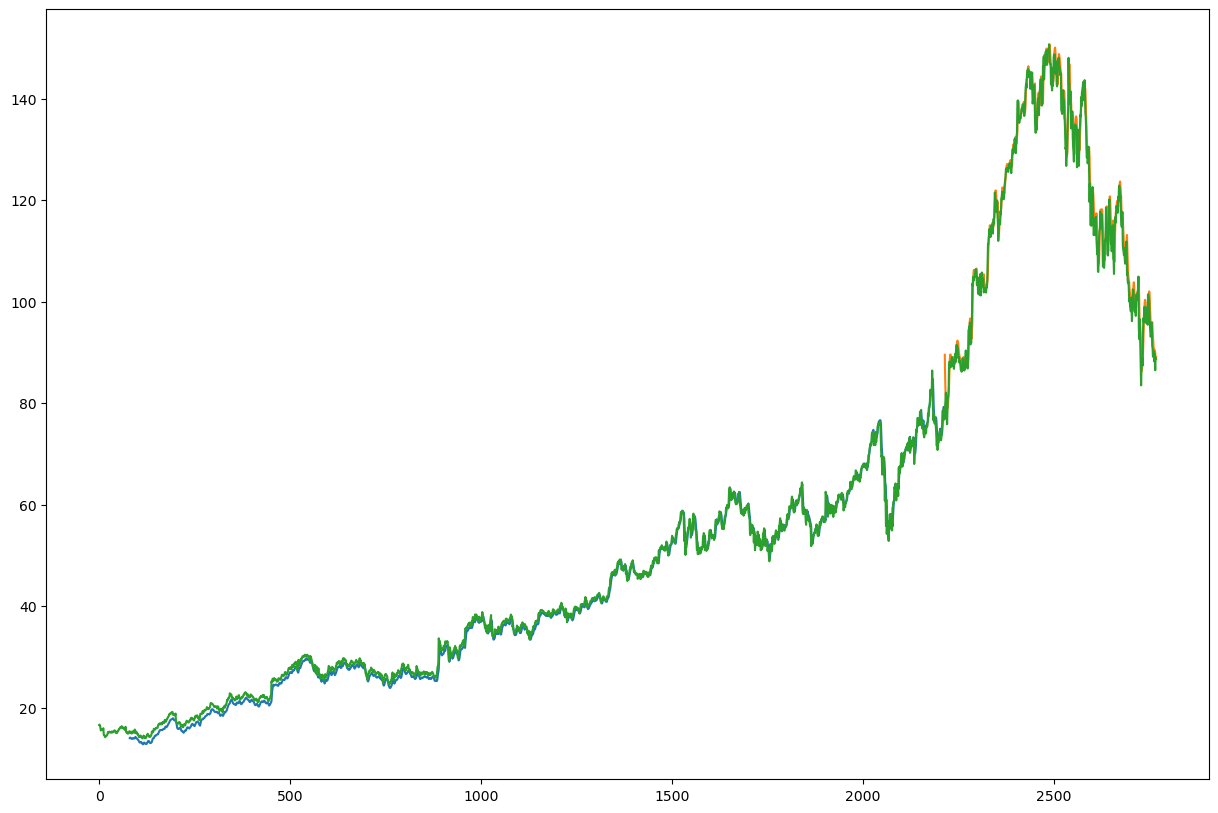

In [259]:
plt.figure(figsize=(15,10))
train_plot=np.empty_like(close)
train_plot[:,:]=np.nan
train_plot[80:len(train_pred)+80,:]=train_pred

train_plot=scaler.inverse_transform(train_plot)

test_plot=np.empty_like(close)
test_plot[:,:]=np.nan
test_plot[len(train_pred)+80:,:]=test_pred
test_plot=scaler.inverse_transform(test_plot)

plt.plot(train_plot)
plt.plot(test_plot)
plt.plot(close)
plt.show()

In [260]:
x_t=x_t.reshape((x_t.shape[0],80,1))

In [261]:
x1=scaled_data[-80:]
x1=x1.reshape((1,80,1))

In [262]:
yhat=model.predict(x1)
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[0.55271155]], dtype=float32)

In [263]:
test_input=scaled_data[-80:]
test_input=np.append(test_input,yhat)
test_input=test_input[1:]
test_input.shape

(80,)

In [264]:
y_predict=[]
i=0
while i<30:
    input=test_input.reshape((1,80,1))
    yhat=model.predict(input)
    y_predict.append(yhat)
    test_input=np.append(test_input,yhat)
    test_input=test_input[1:]
    i+=1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━

In [265]:
y_predict=np.array(y_predict)
y_predict=y_predict.reshape((30,1))

In [266]:
y_predict=scaler.inverse_transform(y_predict)

In [267]:
y30=np.zeros((len(close)+30,1))
y30[:,:]=np.nan
y30[len(close):,:]=y_predict
y30.shape

(2798, 1)

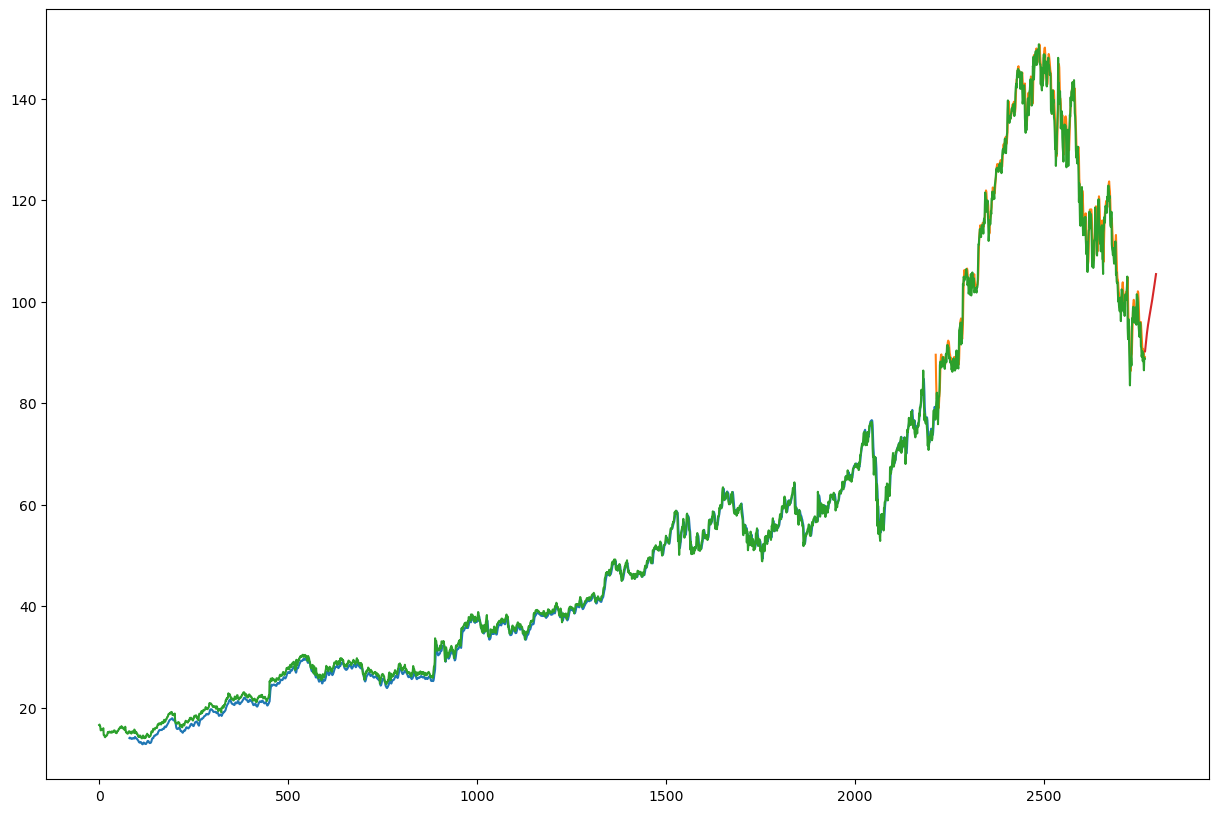

In [268]:
plt.figure(figsize=(15,10))
plt.plot(train_plot)
plt.plot(test_plot)
plt.plot(close)
plt.plot(y30)
plt.show()